In [1]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df['size_category'].value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

In [7]:
x = df.drop(['size_category'], axis = 1)
y = df['size_category']

In [9]:
            # Encode categorical variables 'month' and 'day'
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
x['month_encoded'] = label_encoder.fit_transform(x['month'])
x['day_encoded'] = label_encoder.fit_transform(x['day'])


In [10]:
                  # Drop the original categorical columns
x = x.drop(['month', 'day'], axis=1)


In [11]:
          # Map 'small' and 'large' to 0 and 1 for binary classification
y = y.map({'small': 0, 'large': 1})


In [13]:
          # Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
                    # Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [19]:
                 # Build and train the SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [20]:
y_pred = svm_model.predict(x_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.9134615384615384
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        76
           1       0.88      0.79      0.83        28

    accuracy                           0.91       104
   macro avg       0.90      0.87      0.89       104
weighted avg       0.91      0.91      0.91       104



In [23]:
###############################################################

In [24]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [34]:
cancer = load_breast_cancer()
x = cancer.data[:, :2]
y = cancer.target

In [30]:
svm = SVC(kernel='rbf', C=1.0, gamma=0.5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
svm.fit(x, y)

SVC(gamma=0.5)

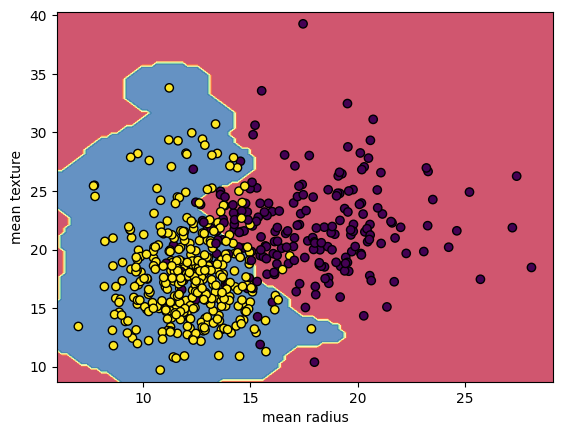

In [31]:
# plot Decision Boundary
from sklearn.inspection import DecisionBoundaryDisplay # Import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(svm, x, response_method='predict', cmap=plt.cm.Spectral,
                                       alpha=0.8, xlabel=cancer.feature_names[0], ylabel=cancer.feature_names[1])
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    cancer.data,cancer.target,test_size=0.2, random_state=42)

ValueError: too many values to unpack (expected 4)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, # Removed extra arguments
                                                    test_size=0.2, random_state=42)

In [42]:
svm_model = SVC(kernel='linear', gamma=0.5,C=1)
svm_model.fit(x_train, y_train)

SVC(C=1, gamma=0.5, kernel='linear')

In [43]:
y_pred = svm_model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9035087719298246


In [45]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [46]:
# ploting ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

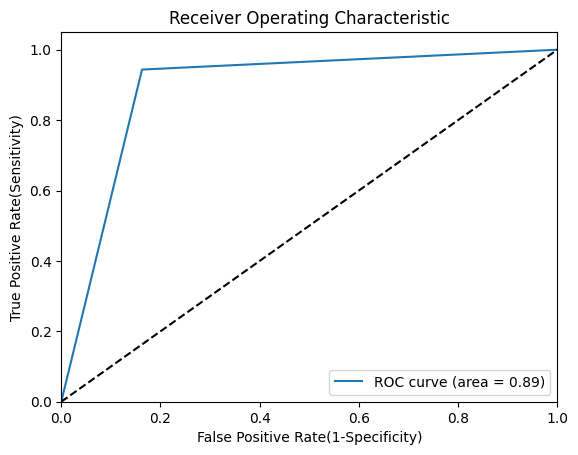

In [47]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
roc_auc = auc(fpr, tpr)

In [49]:
roc_auc

0.8904356370782837

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(roc_auc))

ROC AUC: 0.8904
